# Exploratory data analysis and data preprocessing

In [63]:
#Importing relevant libraries and packages
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D

#Ignoring warning messages 
import warnings
warnings.filterwarnings("ignore")
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

In [64]:
#Uploading the Mammographic Mass Dataset from the UCI repository
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/mammographic-masses/mammographic_masses.data'

#Specifying the column names
column_names = ["BI-RADS assessment", "age", "mass_shape","mass_margin","mass_density","severity_class"]

#Reading the dataset into a pandas DataFrame
df = pd.read_csv(url, header=None, names=column_names)

#Viewing the top 5 rows of the dataset
df.head(5)

,BI-RADS assessment,age,mass_shape,mass_margin,mass_density,severity_class
0,5,67,3,5,3,1
1,4,43,1,1,?,1
2,5,58,4,5,3,1
3,4,28,1,1,3,0
4,5,74,1,5,?,1


In [65]:
#Using df.info() function to determine the type of data in the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961 entries, 0 to 960
Data columns (total 6 columns):
BI-RADS assessment    961 non-null object
age                   961 non-null object
mass_shape            961 non-null object
mass_margin           961 non-null object
mass_density          961 non-null object
severity_class        961 non-null int64
dtypes: int64(1), object(5)
memory usage: 45.1+ KB


In [66]:
#Null values are shwon as '?', replacing all null values with an empty space
df.replace(regex=True,inplace=True,to_replace=r'\D',value=r'')
df.head(5)

,BI-RADS assessment,age,mass_shape,mass_margin,mass_density,severity_class
0,5,67,3,5,3,1
1,4,43,1,1,,1
2,5,58,4,5,3,1
3,4,28,1,1,3,0
4,5,74,1,5,,1


In [67]:
#Converting all values from 'object' data type to a numeric value either integer or float
df = df.apply(pd.to_numeric, errors ='ignore')

In [68]:
#Checking that the data type has been changed
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961 entries, 0 to 960
Data columns (total 6 columns):
BI-RADS assessment    959 non-null float64
age                   956 non-null float64
mass_shape            930 non-null float64
mass_margin           913 non-null float64
mass_density          885 non-null float64
severity_class        961 non-null int64
dtypes: float64(5), int64(1)
memory usage: 45.1 KB


In [69]:
#Using .describe function to get an overview of the descriptive statistics of all of the attibutes and target class values
df.describe()

,BI-RADS assessment,age,mass_shape,mass_margin,mass_density,severity_class
count,959.000000,956.000000,930.000000,913.000000,885.000000,961.000000
mean,4.348279,55.487448,2.721505,2.796276,2.910734,0.463059
std,1.783031,14.480131,1.242792,1.566546,0.380444,0.498893
min,0.000000,18.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,45.000000,2.000000,1.000000,3.000000,0.000000
50%,4.000000,57.000000,3.000000,3.000000,3.000000,0.000000
75%,5.000000,66.000000,4.000000,4.000000,3.000000,1.000000
max,55.000000,96.000000,4.000000,5.000000,4.000000,1.000000


In [70]:
#Getting the mode values for all of the attributes and the target class.
df.mode()

,BI-RADS assessment,age,mass_shape,mass_margin,mass_density,severity_class
0,4.0,59.0,4.0,1.0,3.0,0


In [71]:
#The 'BI-RADS assessment' feature is non-predictive and will be dropped.
df = df.drop(columns=["BI-RADS assessment"])
df.head()

,age,mass_shape,mass_margin,mass_density,severity_class
0,67.0,3.0,5.0,3.0,1
1,43.0,1.0,1.0,NaN,1
2,58.0,4.0,5.0,3.0,1
3,28.0,1.0,1.0,3.0,0
4,74.0,1.0,5.0,NaN,1


In [72]:
#Finding the number of missing values in each column
df.isnull().sum() 

age                5
mass_shape        31
mass_margin       48
mass_density      76
severity_class     0
dtype: int64

In [73]:
#Age is a continuous ordinal variable, null values will be replaced by mean values
df.age.fillna(df.age.mean(), inplace=True) 

In [74]:
#Mass density is an ordinal feature, null values will be replaced by mean values
df.mass_density.fillna(df.mass_density.mean(), inplace=True) 

In [75]:
#Null values from the age and mass density feature column have been imputed
df.isnull().sum()

age                0
mass_shape        31
mass_margin       48
mass_density       0
severity_class     0
dtype: int64

In [76]:
#Dropping all rows with remaining null values
df = df.dropna()

In [78]:
#Checking that the DataFrame does not have any null values
df.isnull().sum()

age               0
mass_shape        0
mass_margin       0
mass_density      0
severity_class    0
dtype: int64

In [79]:
#Getting dummy variables for the attributes that have nominal numerical values
df2 = pd.get_dummies(data=df, columns=['mass_shape', 'mass_margin'])
df2.head()

,age,mass_density,severity_class,mass_shape_1.0,mass_shape_2.0,mass_shape_3.0,mass_shape_4.0,mass_margin_1.0,mass_margin_2.0,mass_margin_3.0,mass_margin_4.0,mass_margin_5.0
0,67.0,3.000000,1,0,0,1,0,0,0,0,0,1
1,43.0,2.910734,1,1,0,0,0,1,0,0,0,0
2,58.0,3.000000,1,0,0,0,1,0,0,0,0,1
3,28.0,3.000000,0,1,0,0,0,1,0,0,0,0
4,74.0,2.910734,1,1,0,0,0,0,0,0,0,1


In [80]:
#Changing the order of the columns
df2 = df2[['age', 'mass_density', 'mass_shape_1.0',
       'mass_shape_2.0', 'mass_shape_3.0', 'mass_shape_4.0', 'mass_margin_1.0',
       'mass_margin_2.0', 'mass_margin_3.0', 'mass_margin_4.0',
       'mass_margin_5.0','severity_class']]

In [81]:
df2.head()

,age,mass_density,mass_shape_1.0,mass_shape_2.0,mass_shape_3.0,mass_shape_4.0,mass_margin_1.0,mass_margin_2.0,mass_margin_3.0,mass_margin_4.0,mass_margin_5.0,severity_class
0,67.0,3.000000,0,0,1,0,0,0,0,0,1,1
1,43.0,2.910734,1,0,0,0,1,0,0,0,0,1
2,58.0,3.000000,0,0,0,1,0,0,0,0,1,1
3,28.0,3.000000,1,0,0,0,1,0,0,0,0,0
4,74.0,2.910734,1,0,0,0,0,0,0,0,1,1


# Visualising the distribution of the BI-RADS features included in the dataset 

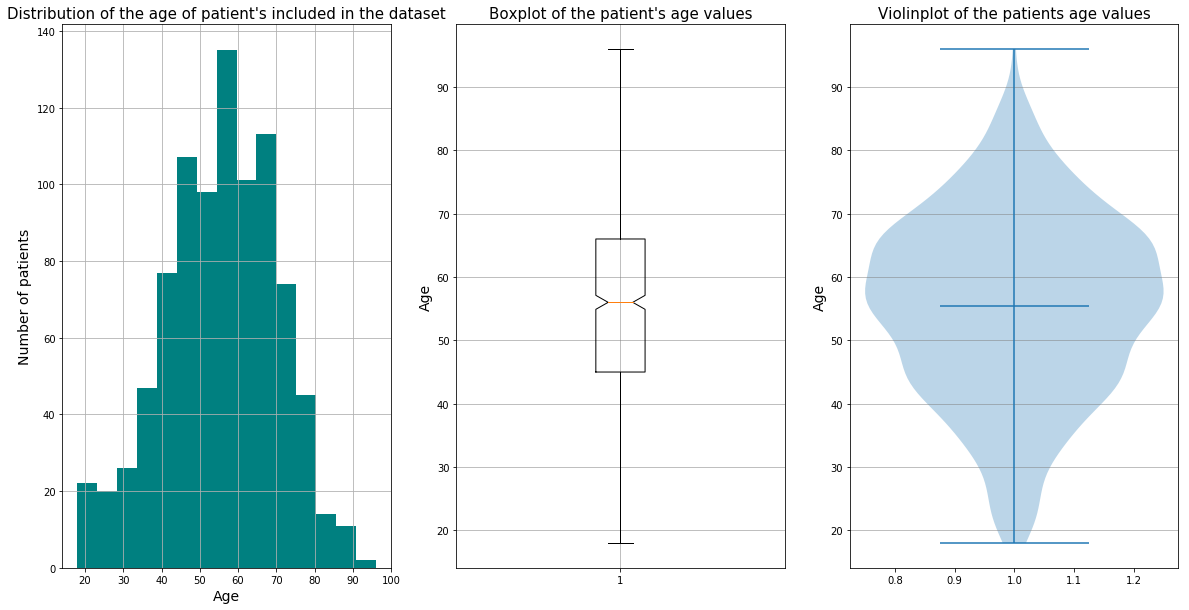

In [82]:
#Visualising the distribution of the age of the patients using histogram, boxplot and violinplot
plt.figure(figsize=(20,10))

plt.subplot(1,3,1)
plt.hist(df.age,histtype='bar',bins=15, color = 'teal') 
plt.grid(True)
plt.xlabel('Age',fontsize = 14)
plt.ylabel('Number of patients', fontsize=14)
plt.title("Distribution of the age of patient's included in the dataset",fontsize=15)

plt.subplot(1,3,2)
plt.boxplot(df.age,notch = True)
plt.grid(color='grey', linestyle='-', linewidth=0.5)
plt.ylabel('Age',fontsize=14)
plt.title("Boxplot of the patient's age values",fontsize =15)

plt.subplot(1,3,3)
plt.violinplot(df.age, showmeans=True, showextrema=True)
plt.grid(b=None,color='grey', linestyle='-', linewidth=0.5,axis = 'y')
plt.ylabel('Age',fontsize=14)
plt.title("Violinplot of the patients age values",fontsize=15)

plt.show()


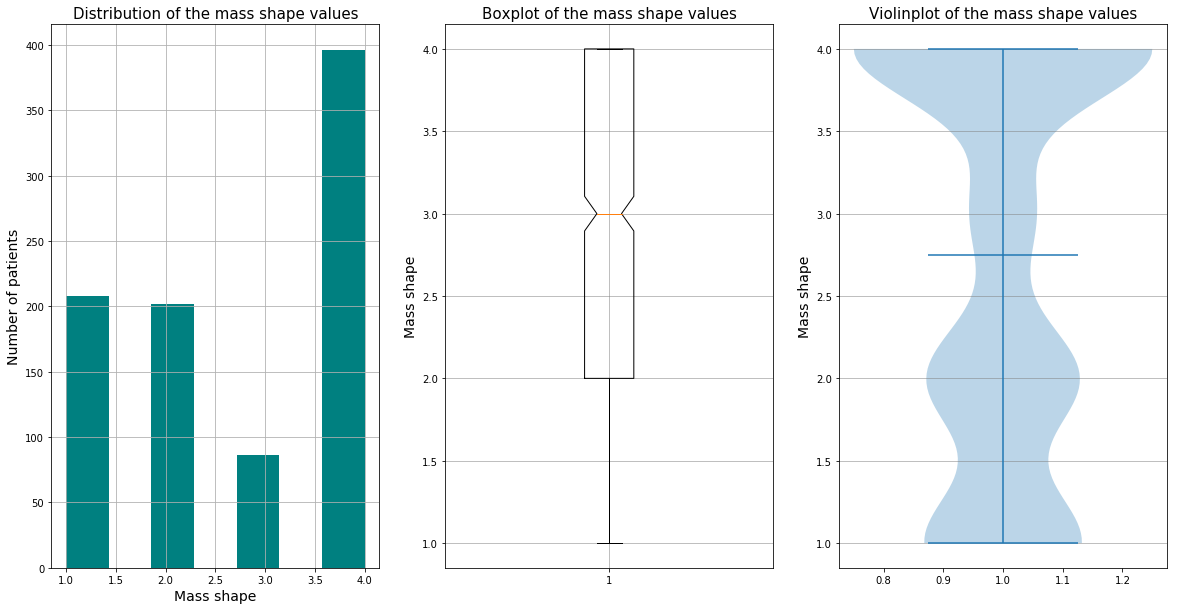

In [83]:
#Visualising the distribution of the mass shape values using histogram, boxplot and violinplot
plt.figure(figsize=(20,10))

plt.subplot(1,3,1)
plt.hist(df.mass_shape,histtype='bar',bins=7, color = 'teal') 
plt.grid(True)
plt.xlabel('Mass shape',fontsize = 14)
plt.ylabel('Number of patients', fontsize=14)
plt.title("Distribution of the mass shape values",fontsize=15)


plt.subplot(1,3,2)
plt.boxplot(df.mass_shape,notch = True)
plt.grid(color='grey', linestyle='-', linewidth=0.5)
plt.ylabel('Mass shape',fontsize=14)
plt.title("Boxplot of the mass shape values",fontsize =15)

plt.subplot(1,3,3)
plt.violinplot(df.mass_shape, showmeans=True, showextrema=True)
plt.grid(b=None,color='grey', linestyle='-', linewidth=0.5,axis = 'y')
plt.ylabel('Mass shape',fontsize=14)
plt.title("Violinplot of the mass shape values",fontsize=15)

plt.show()

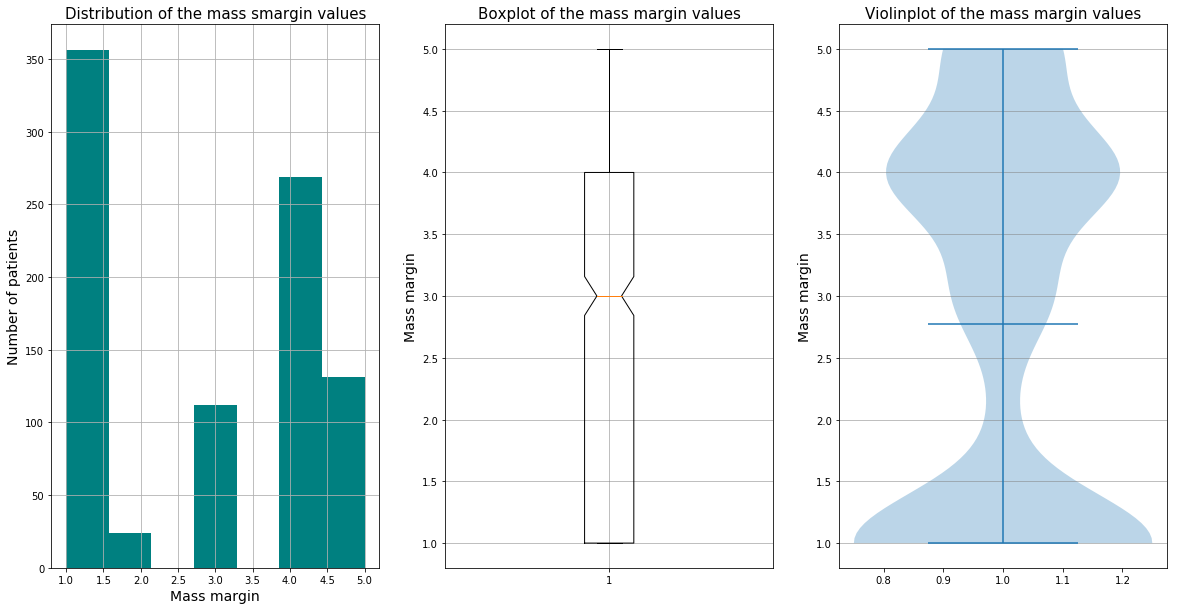

In [84]:
#Visualising the distribution of the mass margin values using histogram, boxplot and violinplot
plt.figure(figsize=(20,10))

plt.subplot(1,3,1)
plt.hist(df.mass_margin,histtype='bar',bins=7, color = 'teal') 
plt.grid(True)
plt.xlabel('Mass margin',fontsize = 14)
plt.ylabel('Number of patients', fontsize=14)
plt.title("Distribution of the mass smargin values",fontsize=15)


plt.subplot(1,3,2)
plt.boxplot(df.mass_margin,notch = True)
plt.grid(color='grey', linestyle='-', linewidth=0.5)
plt.ylabel('Mass margin',fontsize=14)
plt.title("Boxplot of the mass margin values",fontsize =15)

plt.subplot(1,3,3)
plt.violinplot(df.mass_margin, showmeans=True, showextrema=True)
plt.grid(b=None,color='grey', linestyle='-', linewidth=0.5,axis = 'y')
plt.ylabel('Mass margin',fontsize=14)
plt.title("Violinplot of the mass margin values",fontsize=15)

plt.show()

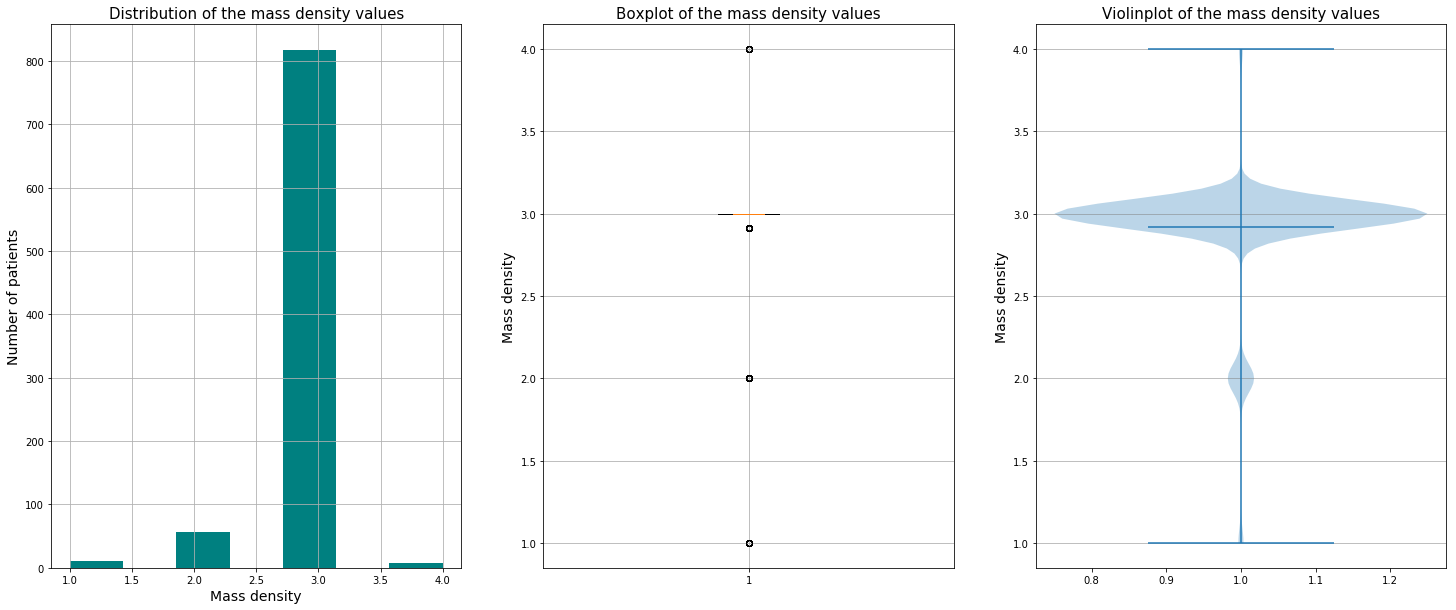

In [85]:
#Visualising the distribution of the mass density values using histogram, boxplot and violinplot
plt.figure(figsize=(25,10))

plt.subplot(1,3,1)
plt.hist(df.mass_density,histtype='bar',bins=7, color = 'teal') 
plt.grid(True)
plt.xlabel('Mass density',fontsize = 14)
plt.ylabel('Number of patients', fontsize=14)
plt.title("Distribution of the mass density values",fontsize=15)


plt.subplot(1,3,2)
plt.boxplot(df.mass_density,notch = True)
plt.grid(color='grey', linestyle='-', linewidth=0.5)
plt.ylabel('Mass density',fontsize=14)
plt.title("Boxplot of the mass density values",fontsize =15)

plt.subplot(1,3,3)
plt.violinplot(df.mass_density, showmeans=True, showextrema=True)
plt.grid(b=None,color='grey', linestyle='-', linewidth=0.5,axis = 'y')
plt.ylabel('Mass density',fontsize=14)
plt.title("Violinplot of the mass density values",fontsize=15)

plt.show()

age                  AxesSubplot(0.125,0.657941;0.227941x0.222059)
mass_shape        AxesSubplot(0.398529,0.657941;0.227941x0.222059)
mass_margin       AxesSubplot(0.672059,0.657941;0.227941x0.222059)
mass_density         AxesSubplot(0.125,0.391471;0.227941x0.222059)
severity_class    AxesSubplot(0.398529,0.391471;0.227941x0.222059)
dtype: object

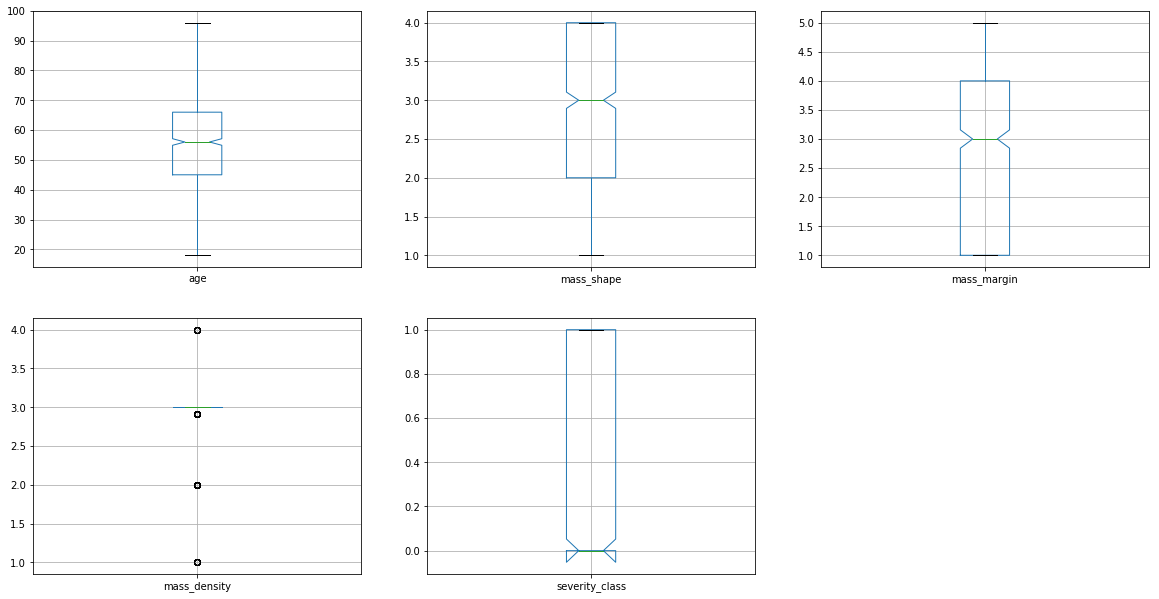

In [86]:
#Visualising the boxplots of all of the features
df.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(20,16), grid = True, notch = True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002177504D3C8>,
      dtype=object)

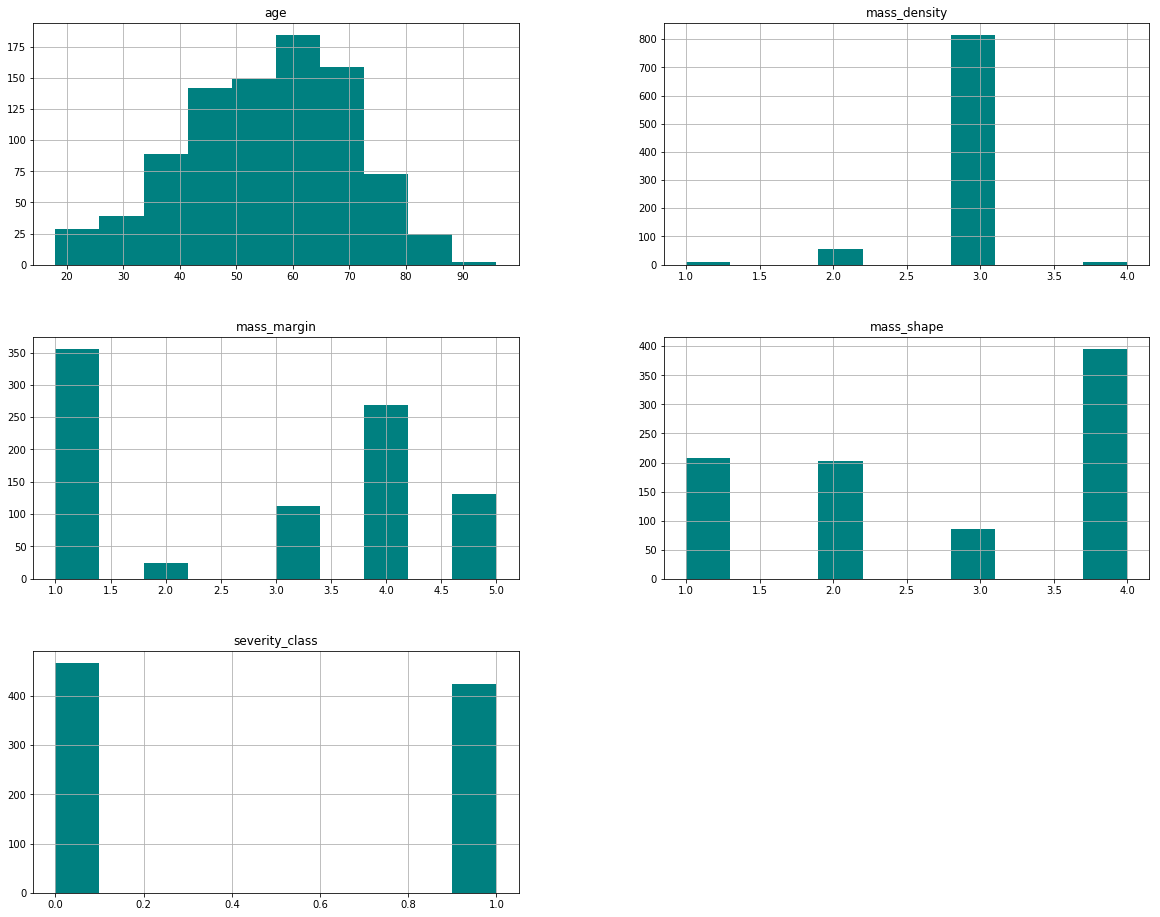

In [87]:
#Visalising the distribution of all of the attributes using histograms
df.hist(figsize=(20,16),bins = 10,color = 'teal')

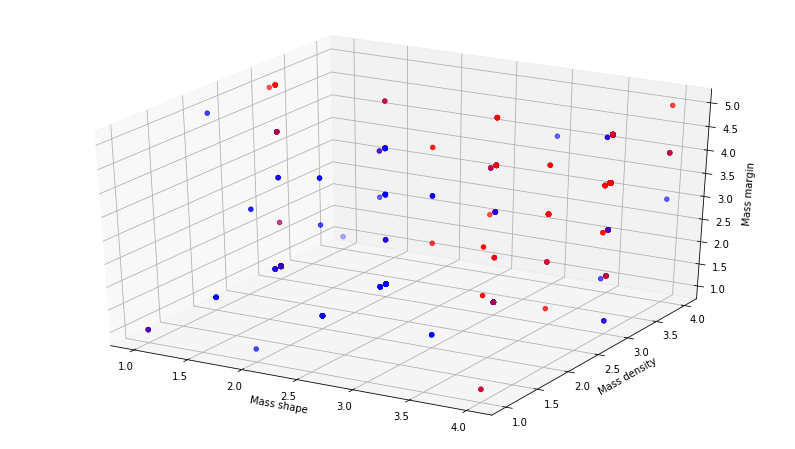

In [93]:
#Plotting the mass margin, mass shape and mass density features in a 3D space
feature1 = df['mass_shape'].values
feature2 = df['mass_density'].values 
feature3 = df['mass_margin'].values

df['severity_class']=df['severity_class'].astype('str')

c = df['severity_class'].values
df['severity_class']= df['severity_class'].astype('int')
c[c=='0'] = 'b' #benign
c[c=='1'] = 'r' #malignant

fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(feature1, feature2, feature3, c=c)
ax.set_xlabel('Mass shape')
ax.set_ylabel('Mass density')
ax.set_zlabel('Mass margin')

plt.show()

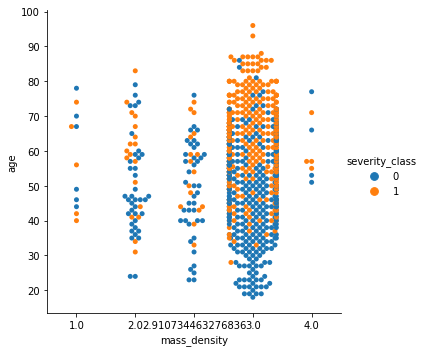

In [94]:
#Plotting age and mass density in a swarmplot 
sns.catplot(x= "mass_density", y="age", hue = "severity_class", kind= "swarm", data=df)

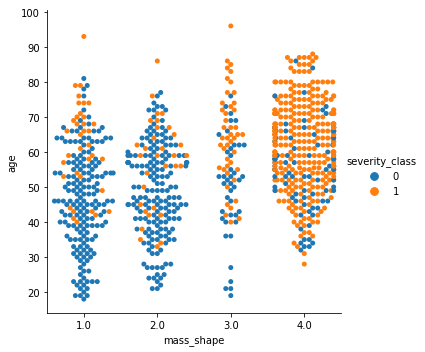

In [95]:
#Plotting age and mass shape in a swarmplot 
sns.catplot(x= "mass_shape", y="age", hue = "severity_class", kind= "swarm", data=df)

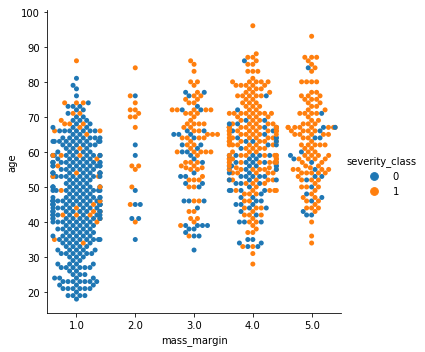

In [96]:
#Plotting age and mass margin in a swarmplot 
sns.catplot(x= "mass_margin", y="age", hue = "severity_class", kind= "swarm", data=df)

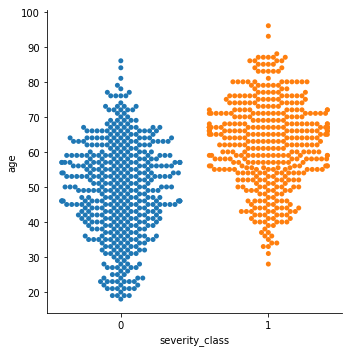

In [97]:
#Plotting age and severity class in a swarmplot
import seaborn as sns
sns.catplot(x= "severity_class", y="age", hue = "severity_class", kind= "swarm", data=df)

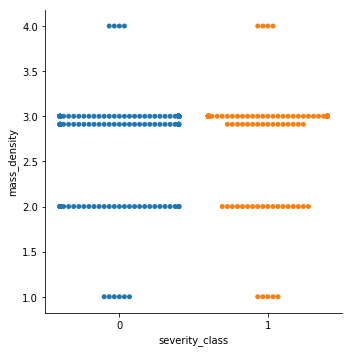

In [98]:
#Plotting severity class  and mass density in a swarmplot 
sns.catplot(x= "severity_class", y="mass_density", hue = "severity_class", kind= "swarm", data=df);

In [99]:
#Computing the pairwise correlation of the feature columns
df2.corr()

,age,mass_density,mass_shape_1.0,mass_shape_2.0,mass_shape_3.0,mass_shape_4.0,mass_margin_1.0,mass_margin_2.0,mass_margin_3.0,mass_margin_4.0,mass_margin_5.0,severity_class
age,1.000000,0.051027,-0.244675,-0.197948,0.047386,0.346838,-0.430802,0.038367,0.114147,0.218025,0.188940,0.446321
mass_density,0.051027,1.000000,-0.016596,-0.078996,-0.012641,0.088179,-0.123675,0.019014,0.030593,0.047255,0.072505,0.067809
mass_shape_1.0,-0.244675,-0.016596,1.000000,-0.298370,-0.180130,-0.492732,0.546715,-0.058926,-0.176957,-0.304589,-0.168876,-0.333766
mass_shape_2.0,-0.197948,-0.078996,-0.298370,1.000000,-0.176739,-0.483457,0.352141,-0.007201,-0.091857,-0.145426,-0.209354,-0.343368
mass_shape_3.0,0.047386,-0.012641,-0.180130,-0.176739,1.000000,-0.291869,-0.095577,0.086527,0.094016,0.041919,-0.049683,0.031344
mass_shape_4.0,0.346838,0.088179,-0.492732,-0.483457,-0.291869,1.000000,-0.705160,0.004815,0.172133,0.356832,0.349599,0.554692
mass_margin_1.0,-0.430802,-0.123675,0.546715,0.352141,-0.095577,-0.705160,1.000000,-0.135515,-0.308819,-0.535519,-0.338132,-0.587769
mass_margin_2.0,0.038367,0.019014,-0.058926,-0.007201,0.086527,0.004815,-0.135515,1.000000,-0.063010,-0.109264,-0.068990,0.049833
mass_margin_3.0,0.114147,0.030593,-0.176957,-0.091857,0.094016,0.172133,-0.308819,-0.063010,1.000000,-0.248997,-0.157219,0.127113
mass_margin_4.0,0.218025,0.047255,-0.304589,-0.145426,0.041919,0.356832,-0.535519,-0.109264,-0.248997,1.000000,-0.272631,0.289254


Text(0.5, 1.0, 'Correlation Matrix for mammographic masses dataset')

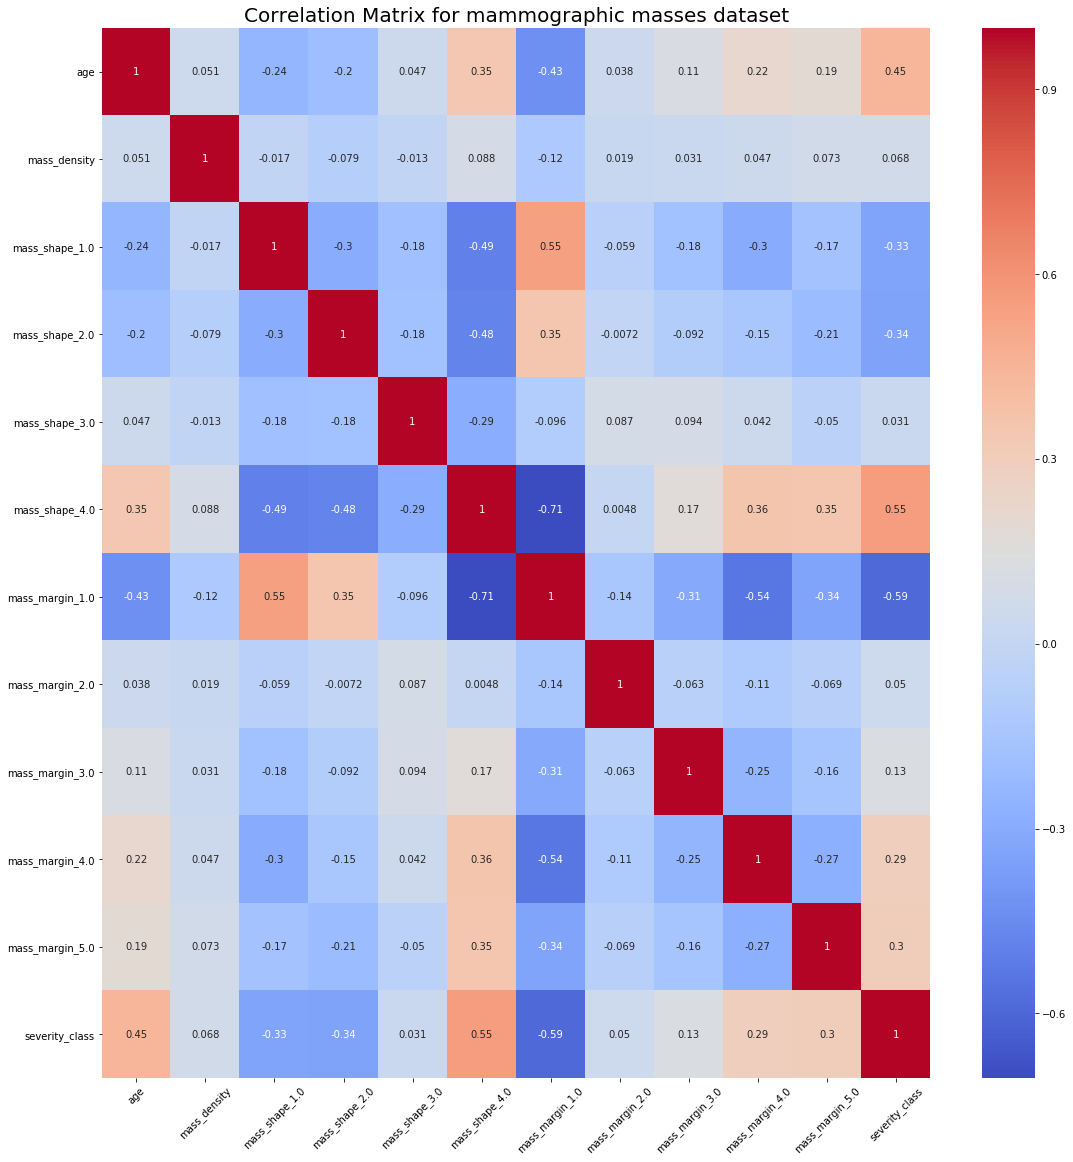

In [100]:
#Ploting the correlation values in a heatmap
fig, ax = plt.subplots(figsize=(16,16))  
corr1 = df2.corr()
ax = sns.heatmap(corr1, annot = True, cmap="coolwarm")
plt.setp(ax.axes.get_xticklabels(), rotation=45)
plt.tight_layout()
plt.title('Correlation Matrix for mammographic masses dataset',fontsize = 20)

In [101]:
# Creating the input variable for the classifiers
X = df2.drop('severity_class',axis = 1) # selecting the feature colums, only excluding the target coulumn 'severity_class'
y = df2['severity_class']

In [102]:
#Determining the class distribution
print ("number of all feature vectors:", y.size)
print ("number of malignant feature vectors: ", np.sum(y))
print ("number of benign feature vectors: ",  y.size-np.sum(y))

number of all feature vectors: 892
number of malignant feature vectors:  424
number of benign feature vectors:  468


In [103]:
#Determining the class distribution as a percentage
benign_data_raw = y[y == 0]
malign_data_raw = y[y == 1]

percentage = len(malign_data_raw)/float(len(benign_data_raw))
sample_size = int(percentage*len(benign_data_raw))


print ("\nPercentage of benign tumours            :", len(benign_data_raw) / float(len(y)))
print ("Percentage of malign tumours            :", len(malign_data_raw) / float(len(y)))
print ("\nTotal number of data in our new dataset :", len(y))


Percentage of benign tumours            : 0.5246636771300448
Percentage of malign tumours            : 0.47533632286995514

Total number of data in our new dataset : 892


In [104]:
#Spliting the data into training and testing sets, 80% of data will be used for training and 20% of data is kept aside 
#for testing
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, 
                     test_size=0.20,
                     stratify=y,
                     random_state=1)

# Learning curves 

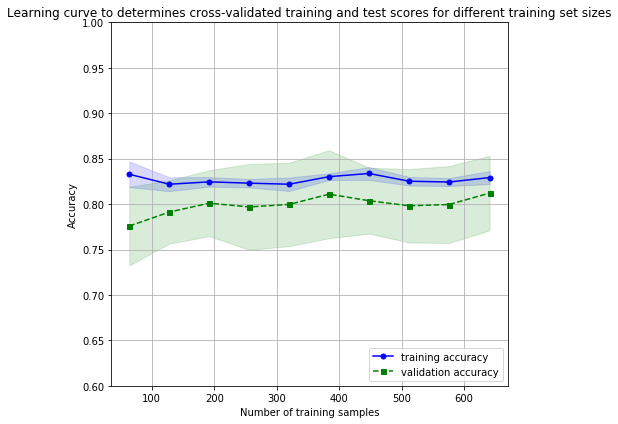

In [105]:
#learning curve to help determine if the SVC model is likely to overfit or underfit
pipe_svc = Pipeline([('scl', StandardScaler()),
                    ('clf', SVC(probability=True, verbose = False))])

train_sizes, train_scores, test_scores =\
                learning_curve(estimator=pipe_svc,
                               X=X_train,
                               y=y_train,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=10,
                               n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(8,6))

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training samples',fontsize =10)
plt.ylabel('Accuracy',fontsize =10)
plt.legend(loc='lower right')
plt.ylim([0.6, 1])
plt.title('Learning curve to determines cross-validated training and test scores for different training set sizes', fontsize = 12)
plt.tight_layout()
plt.show()

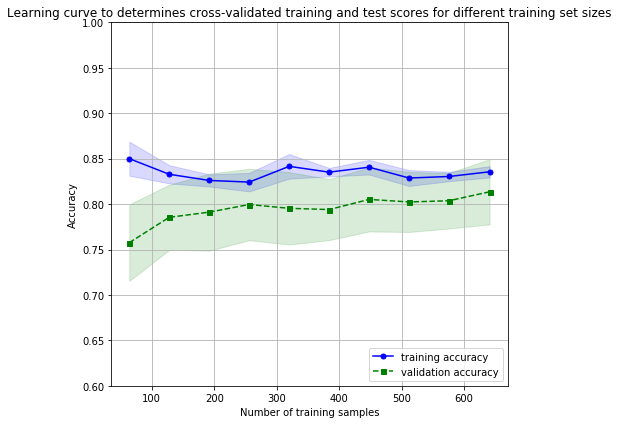

In [106]:
#learning curve to help determine if the MLP model is likely to overfit or underfit
pipe_mlp= Pipeline([('scl', StandardScaler()),
                     ('clf', MLPClassifier(max_iter=150, tol=1e-4, random_state=1))])

train_sizes, train_scores, test_scores =\
                learning_curve(estimator=pipe_mlp,
                               X=X_train,
                               y=y_train,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=10,
                               n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(8,6))

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training samples',fontsize =10)
plt.ylabel('Accuracy',fontsize =10)
plt.legend(loc='lower right')
plt.ylim([0.6, 1])
plt.title('Learning curve to determines cross-validated training and test scores for different training set sizes', fontsize = 12)
plt.tight_layout()
plt.show()

# Feature selection

 1) age                            0.435840
 2) mass_margin_1.0                0.196028
 3) mass_shape_4.0                 0.142460
 4) mass_shape_2.0                 0.048772
 5) mass_shape_1.0                 0.038425
 6) mass_density                   0.038356
 7) mass_margin_5.0                0.031716
 8) mass_margin_4.0                0.029522
 9) mass_shape_3.0                 0.017209
10) mass_margin_3.0                0.013767
11) mass_margin_2.0                0.007906


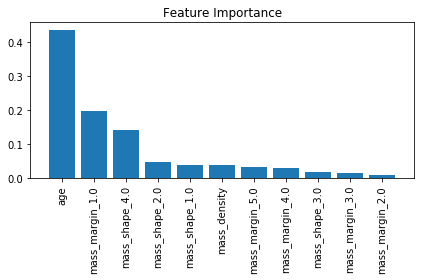

In [107]:
#Selecting the most impportant features to be used for building the models using Random Forest CLassifier
from sklearn.ensemble import RandomForestClassifier

feat_labels = df2.columns[:-1]

forest = RandomForestClassifier(n_estimators=500,
                                random_state=1)

forest.fit(X_train, y_train)
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), 
        importances[indices],
        align='center')

plt.xticks(range(X_train.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

In [217]:
#Redefining the features to be used for building the model, only including the 5 most important featres
X=df2[['age','mass_margin_1.0', 'mass_shape_4.0','mass_shape_2.0']]

In [218]:
#Using StandardScaler to centre feature columns to have a mean of 0 and a standard deviation of 1 
X = StandardScaler().fit_transform(X)
#Splitting the data with new predictive features into training and test sets
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, 
                     test_size=0.20,
                     stratify=y,
                     random_state=1)

# Using Principal Component Analysis following feature selection


In [219]:
#Calculating the variance explained by the number of different feature components
pca = PCA()
X_train_pca = pca.fit_transform(X_train)
pca.explained_variance_ratio_

array([0.5732702 , 0.20471777, 0.15586052, 0.06615151])

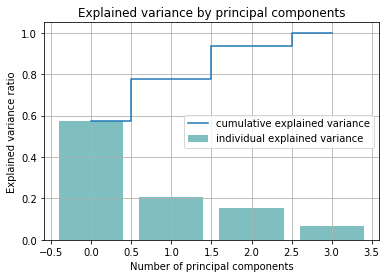

In [220]:
#Plotting the variance explained ratio and the cumulative variance
plt.bar(np.arange(4), pca.explained_variance_ratio_, alpha=0.5, color = 'teal', align='center',label='individual explained variance')
plt.step(np.arange(4), np.cumsum(pca.explained_variance_ratio_), where='mid',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Number of principal components')
plt.grid(True)
plt.legend(loc='best')
plt.title('Explained variance by principal components')
plt.show()

# Optimisation of the Support Vector Classifier


In [221]:
#Determining the effect that different number of PCA components have on the SVC model accuracy following feature selection
def plotvector(X_train, y_train, X_test, y_test):
    results = []
    
    for i in range(1, 5):
        pipe_svc = Pipeline([('pca',PCA(n_components = i)),
                     ('clf',SVC(probability=True, verbose = False))])
        
        pipe_svc.fit(X_train, y_train)
        results.append([i, pipe_svc.score(X_test, y_test)])
 
    return np.array(results)

PCA_accuracy =  plotvector(X_train, y_train, X_test, y_test)
PCA_accuracy

array([[1.        , 0.80446927],
       [2.        , 0.80446927],
       [3.        , 0.80446927],
       [4.        , 0.79888268]])

Text(0.5, 1.0, 'Accuracy with increasing principal component')

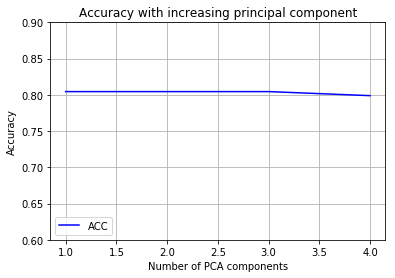

In [222]:
#Plotting the accuracy of the model with different number of PCA components
plt.plot(PCA_accuracy[:,0], PCA_accuracy[:,1], color='b', label='ACC')
plt.legend(loc=3)
plt.ylim(0.6, 0.9)
plt.grid(True)
plt.ylabel('Accuracy')
plt.xlabel('Number of PCA components')
plt.title("Accuracy with increasing principal component")

In [223]:
pipelines_SVC = []

In [224]:
#Putting together the Support Vector Classifier Pipeline with PCA
pipe_SVC = Pipeline([('scl',StandardScaler()),
                    ('pca',PCA(n_components = 2)),
                     ('clf',SVC(probability=True, verbose = False))])

#Fitting the pipeline to the training data
pipe_SVC.fit(X_train, y_train)

#Calculating cross validated accuracy scores
scores = cross_val_score(estimator=pipe_SVC, X=X_train, y=y_train, cv=10, n_jobs=1, verbose=0,scoring='accuracy')
print('--> Model Training Accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))
print('--> Model Test Accuracy: %f' % pipe_SVC.score(X_test, y_test))


--> Model Training Accuracy: 0.816 +/- 0.053
--> Model Test Accuracy: 0.804469


In [225]:
#Putting together the Support Vector Classifier Pipeline without PCA
pipe_SVC_no_PCA = Pipeline([('scl',StandardScaler()),
                            ('clf',SVC(probability=True, verbose = False))])

#Fitting the pipeline to the training data
pipe_SVC_no_PCA.fit(X_train, y_train)

#Calculating cross validated accuracy scores
scores = cross_val_score(estimator=pipe_SVC_no_PCA, X=X_train, y=y_train, cv=10, n_jobs=1, verbose=0, scoring = 'accuracy')
print('--> Model Training Accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))
print('--> Model Test Accuracy: %f' % pipe_SVC_no_PCA.score(X_test, y_test))

#Appending the results to the pipelines_SVC list
pipelines_SVC.append(( 'SVC_pipeline_no_PCA', pipe_SVC_no_PCA))

--> Model Training Accuracy: 0.811 +/- 0.044
--> Model Test Accuracy: 0.798883


Tuning hyper-parameters for accuracy

Best score with tuned parameters uring GridSearchCV:  0.8218793828892006

Best parameters set found on development set using GridSearchCV: 
 {'clf__C': 1.0, 'clf__gamma': 0.01, 'clf__kernel': 'rbf'}

Grid scores on development set:

0.525 (+/-0.007) for {'clf__C': 0.0001, 'clf__kernel': 'linear'}
0.811 (+/-0.092) for {'clf__C': 0.001, 'clf__kernel': 'linear'}
0.820 (+/-0.099) for {'clf__C': 0.01, 'clf__kernel': 'linear'}
0.820 (+/-0.102) for {'clf__C': 0.1, 'clf__kernel': 'linear'}
0.820 (+/-0.102) for {'clf__C': 1.0, 'clf__kernel': 'linear'}
0.820 (+/-0.102) for {'clf__C': 10.0, 'clf__kernel': 'linear'}
0.820 (+/-0.102) for {'clf__C': 100.0, 'clf__kernel': 'linear'}
0.525 (+/-0.007) for {'clf__C': 0.0001, 'clf__gamma': 0.0001, 'clf__kernel': 'rbf'}
0.525 (+/-0.007) for {'clf__C': 0.0001, 'clf__gamma': 0.001, 'clf__kernel': 'rbf'}
0.525 (+/-0.007) for {'clf__C': 0.0001, 'clf__gamma': 0.01, 'clf__kernel': 'rbf'}
0.525 (+/-0.007) for {'clf__C': 0.000

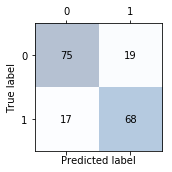

______________________________________________________________________________


Tuning hyper-parameters for precision

Best score with tuned parameters uring GridSearchCV:  0.7997459247462296

Best parameters set found on development set using GridSearchCV: 
 {'clf__C': 0.1, 'clf__gamma': 100.0, 'clf__kernel': 'rbf'}

Grid scores on development set:

0.000 (+/-0.000) for {'clf__C': 0.0001, 'clf__kernel': 'linear'}
0.769 (+/-0.095) for {'clf__C': 0.001, 'clf__kernel': 'linear'}
0.789 (+/-0.110) for {'clf__C': 0.01, 'clf__kernel': 'linear'}
0.792 (+/-0.112) for {'clf__C': 0.1, 'clf__kernel': 'linear'}
0.792 (+/-0.112) for {'clf__C': 1.0, 'clf__kernel': 'linear'}
0.792 (+/-0.112) for {'clf__C': 10.0, 'clf__kernel': 'linear'}
0.792 (+/-0.112) for {'clf__C': 100.0, 'clf__kernel': 'linear'}
0.000 (+/-0.000) for {'clf__C': 0.0001, 'clf__gamma': 0.0001, 'clf__kernel': 'rbf'}
0.000 (+/-0.000) for {'clf__C': 0.0001, 'clf__gamma': 0.001, 'clf__kernel': 'rbf'}
0.000 (+/-0.000) for {'clf__C': 0.00

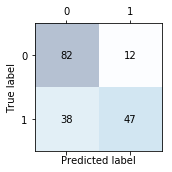

______________________________________________________________________________


Tuning hyper-parameters for recall

Best score with tuned parameters uring GridSearchCV:  0.8615113264482128

Best parameters set found on development set using GridSearchCV: 
 {'clf__C': 0.001, 'clf__kernel': 'linear'}

Grid scores on development set:

0.000 (+/-0.000) for {'clf__C': 0.0001, 'clf__kernel': 'linear'}
0.862 (+/-0.111) for {'clf__C': 0.001, 'clf__kernel': 'linear'}
0.853 (+/-0.125) for {'clf__C': 0.01, 'clf__kernel': 'linear'}
0.847 (+/-0.127) for {'clf__C': 0.1, 'clf__kernel': 'linear'}
0.847 (+/-0.127) for {'clf__C': 1.0, 'clf__kernel': 'linear'}
0.847 (+/-0.127) for {'clf__C': 10.0, 'clf__kernel': 'linear'}
0.847 (+/-0.127) for {'clf__C': 100.0, 'clf__kernel': 'linear'}
0.000 (+/-0.000) for {'clf__C': 0.0001, 'clf__gamma': 0.0001, 'clf__kernel': 'rbf'}
0.000 (+/-0.000) for {'clf__C': 0.0001, 'clf__gamma': 0.001, 'clf__kernel': 'rbf'}
0.000 (+/-0.000) for {'clf__C': 0.0001, 'clf__gamma': 0

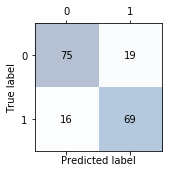

______________________________________________________________________________


Tuning hyper-parameters for f1

Best score with tuned parameters uring GridSearchCV:  0.8192821633428774

Best parameters set found on development set using GridSearchCV: 
 {'clf__C': 1.0, 'clf__gamma': 0.01, 'clf__kernel': 'rbf'}

Grid scores on development set:

0.000 (+/-0.000) for {'clf__C': 0.0001, 'clf__kernel': 'linear'}
0.812 (+/-0.093) for {'clf__C': 0.001, 'clf__kernel': 'linear'}
0.819 (+/-0.103) for {'clf__C': 0.01, 'clf__kernel': 'linear'}
0.818 (+/-0.106) for {'clf__C': 0.1, 'clf__kernel': 'linear'}
0.818 (+/-0.106) for {'clf__C': 1.0, 'clf__kernel': 'linear'}
0.818 (+/-0.106) for {'clf__C': 10.0, 'clf__kernel': 'linear'}
0.818 (+/-0.106) for {'clf__C': 100.0, 'clf__kernel': 'linear'}
0.000 (+/-0.000) for {'clf__C': 0.0001, 'clf__gamma': 0.0001, 'clf__kernel': 'rbf'}
0.000 (+/-0.000) for {'clf__C': 0.0001, 'clf__gamma': 0.001, 'clf__kernel': 'rbf'}
0.000 (+/-0.000) for {'clf__C': 0.0001, 'clf

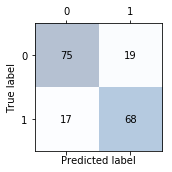

______________________________________________________________________________




In [226]:
#Using Gridsearch to find the most optimal hyperparameters for SVC Classifier using the pipeline PCA 
#as it gave a better preliminary accuracy

#Specifying parameter values:
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
param_grid = [{'clf__C': param_range,'clf__kernel': ['linear']},
              {'clf__C': param_range,'clf__gamma': param_range,
               'clf__kernel': ['rbf'] }]

##Selecting the statistical measurues that will be used to assess performance of the models
scores =['accuracy',
        'precision',
         'recall',
          'f1']

#Performing GridSearchCV, optimising for the different evalutation metrics
for score in scores:
    print("Tuning hyper-parameters for %s" % score)
    print()

    gs = GridSearchCV(estimator=pipe_SVC,
                  param_grid=param_grid,
                  cv=10,
                  n_jobs=1, 
                  scoring= score)
    
    gs.fit(X_train,y_train)
    
    print('Best score with tuned parameters uring GridSearchCV: ', gs.best_score_)
    print()
    print('Best parameters set found on development set using GridSearchCV: \n',gs.best_params_)

    print()
    print("Grid scores on development set:")
    print()
    means = gs.cv_results_['mean_test_score']
    stds = gs.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, gs.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()
    
    clf= gs.best_estimator_

#Using cross validation to determine the final scores
    clf.fit(X_train, y_train)
    scores = cross_val_score(estimator=clf,
                         X=X_train,
                         y=y_train,
                         cv=10,
                         n_jobs=1, scoring = score )
    
    print('--> Final Model Training score using Cross Validation: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))
    print()
    print('--> Final score on Test set: %.5f' % clf.score(X_test,y_test))

    y_true, y_pred = y_test, clf.predict(X_test)
   
    print()
    print("Confusion matrix:")
    print()
    print(confusion_matrix(y_true, y_pred))
    confmat = confusion_matrix(y_true, y_pred)
    print()
    print("Detailed classification report:")
    print()
    print(classification_report(y_true, y_pred))
    print()
    
    pipelines_SVC.append((f"SVC_tuned_for_{score.strip('')}", clf))
    
    
#Plotting the confusion matrix
    print("Confusion matrix:")
    print()
    fig, ax = plt.subplots(figsize=(2.5, 2.5))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.tight_layout()
    plt.show()
    
    print("______________________________________________________________________________")
    print()
    print()


# Comparison of the SVC models

In [227]:
#Calculating the cross-validated accuracy scores for the differently tuned models
results = []
names = []
scoring = 'accuracy'
for name, model in pipelines_SVC:
    cv_results = cross_val_score(model, X_train, y_train, cv=10,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

SVC_pipeline_no_PCA: 0.810813 (0.044040)
SVC_tuned_for_accuracy: 0.822062 (0.051398)
SVC_tuned_for_precision: 0.741930 (0.040703)
SVC_tuned_for_recall: 0.810794 (0.046353)
SVC_tuned_for_f1: 0.822062 (0.051398)


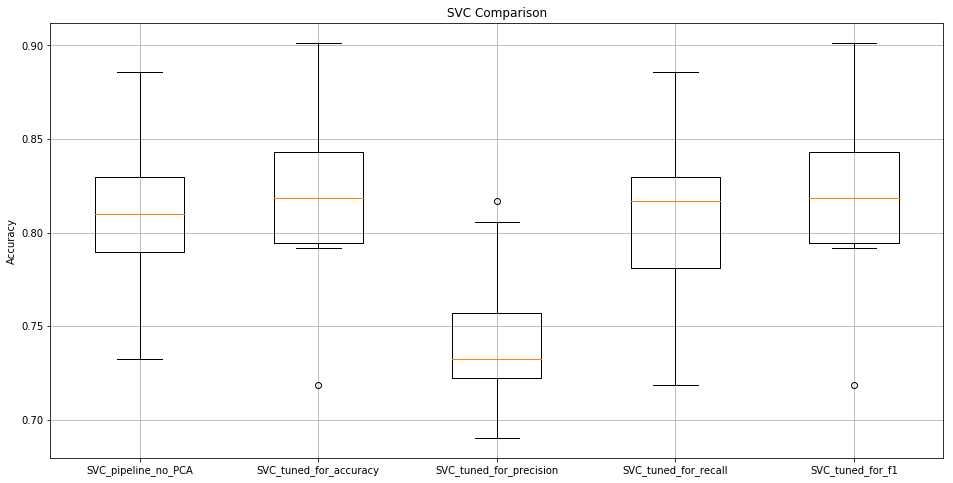

In [228]:
# Plotting boxplots of the differently tuned SVC models for comparison
fig= plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)
plt.boxplot(results)
plt.title('SVC Comparison')
plt.grid(True) 
plt.ylabel('Accuracy')
ax.set_xticklabels(names)
plt.show()

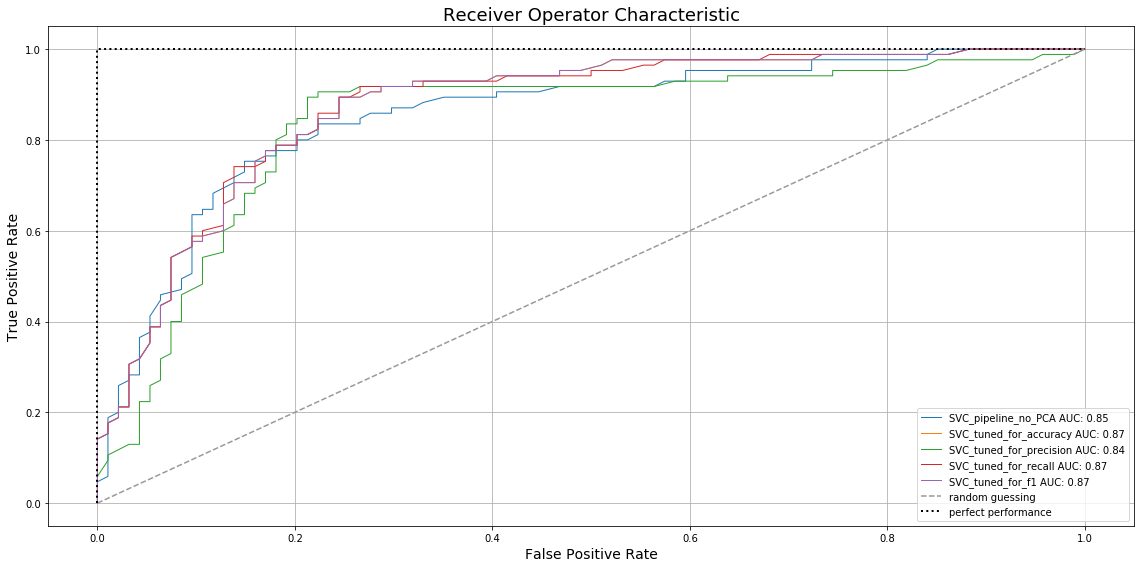

In [229]:
#Plotting the ROC curves for the differently tuned SVC models
fig = plt.figure(figsize=(16, 8))
all_tpr = []

for name,model in pipelines_SVC:
      
    model.fit(X_train, y_train)
    
    probas = model.predict_proba(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, probas[:, 1], pos_label=1)
    roc_auc = auc(fpr, tpr)
    current_auc = str('%.2f' %roc_auc)
    
    plt.plot(fpr, 
             tpr, 
             lw=1, 
             label= str(name + ' AUC: ' + current_auc))

plt.plot([0, 1], 
         [0, 1], 
         linestyle='--', 
         color=(0.6, 0.6, 0.6), 
         label='random guessing')

plt.plot([0, 0, 1], 
         [0, 1, 1], 
         lw=2, 
         linestyle=':', 
         color='black', 
         label='perfect performance')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.grid(True)
plt.xlabel('False Positive Rate',fontsize =14)
plt.ylabel('True Positive Rate',fontsize =14)
plt.title('Receiver Operator Characteristic',fontsize =18)
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

# Optmimising the Multi-layer Perceptron model

In [230]:
pipelines_MLP = []

In [233]:
#Determining the effect that different number of PCA components have on the MLP model accuracy following feature selection
def plotvector(X_train, y_train, X_test, y_test):
    results = []
    
    for i in range(1, 5):
        pipe_mlp = Pipeline([('scl',StandardScaler()),
                     ('pca',PCA(n_components = i)),
                     ('clf',MLPClassifier(max_iter=150, tol=1e-4, random_state=1))])
        
        pipe_mlp.fit(X_train, y_train)
        results.append([i, pipe_mlp.score(X_test, y_test)])
 
    return np.array(results)

PCA_accuracy =  plotvector(X_train, y_train, X_test, y_test)
PCA_accuracy

array([[1.        , 0.79329609],
       [2.        , 0.81005587],
       [3.        , 0.79888268],
       [4.        , 0.79888268]])

Text(0.5, 1.0, 'Accuracy with increasing principal component')

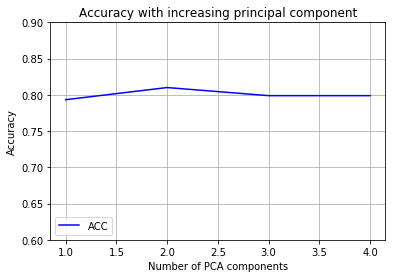

In [234]:
#Plotting the accuracy of the model compared to a different number of PCA components
plt.plot(PCA_accuracy[:,0], PCA_accuracy[:,1], color='b', label='ACC')
plt.legend(loc=3)
plt.ylim(0.6, 0.9)
plt.grid(True)
plt.ylabel('Accuracy')
plt.xlabel('Number of PCA components')
plt.title("Accuracy with increasing principal component")

In [235]:
#Putting together the Multi-layer Perceptron Pipeline with PCA
pipe_mlp = Pipeline([('scl',StandardScaler()),
                     ('pca',PCA(n_components = 2)),
                     ('clf',MLPClassifier(max_iter=150, tol=1e-4, random_state=1))])

#Fitting the pipeline to the training data
pipe_mlp.fit(X_train, y_train)


#Calculating cross validated accuracy scores
scores = cross_val_score(estimator=pipe_mlp, X=X_train, y=y_train, cv=10, n_jobs=1, verbose=0,scoring='accuracy')
print('--> Model Training Accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))
print('--> Model Test Accuracy: %f' % pipe_mlp.score(X_test, y_test))

--> Model Training Accuracy: 0.818 +/- 0.042
--> Model Test Accuracy: 0.810056


In [236]:
#Putting together the Multi-layer Perceptron Pipeline without PCA
pipe_mlp_no_PCA = Pipeline([('scl',StandardScaler()),
                     ('clf',MLPClassifier(max_iter=150))])

#Fitting the pipeline to the training data
pipe_mlp_no_PCA.fit(X_train, y_train)


#Calculating cross validated accuracy scores
scores = cross_val_score(estimator=pipe_mlp_no_PCA, X=X_train, y=y_train, cv=10, n_jobs=1, verbose=0,scoring='accuracy')
print('--> Model Training Accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))
print('--> Model Test Accuracy: %f' % pipe_mlp_no_PCA.score(X_test, y_test))

#Appending the results to the pipelines_MLP list
pipelines_MLP.append(( 'MLP_pipeline_no_PCA', pipe_mlp_no_PCA))

--> Model Training Accuracy: 0.811 +/- 0.044
--> Model Test Accuracy: 0.804469


In [237]:
#Performing PCA with 2 components
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Tuning hyper-parameters for accuracy

--> Tuned Parameters Best Score:  0.820476858345021

--> Best parameters set found on development set: 
 {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 100, 100), 'learning_rate': 'constant', 'solver': 'sgd'}
--> Final Model Training Accuracy score: 0.818 +/- 0.042

--> Final Accuracy score on Test set: 0.81006

Confusion matrix:
[[77 17]
 [17 68]]

Detailed classification report:
              precision    recall  f1-score   support

           0       0.82      0.82      0.82        94
           1       0.80      0.80      0.80        85

   micro avg       0.81      0.81      0.81       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.81      0.81      0.81       179




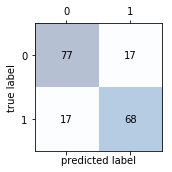

# Tuning hyper-parameters for precision

--> Tuned Parameters Best Score:  0.7923139796838337

--> Best parameters set found on development set: 
 {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 100, 100), 'learning_rate': 'constant', 'solver': 'sgd'}
--> Final Model Training Accuracy score: 0.818 +/- 0.042

--> Final Accuracy score on Test set: 0.81006

Confusion matrix:
[[77 17]
 [17 68]]

Detailed classification report:
              precision    recall  f1-score   support

           0       0.82      0.82      0.82        94
           1       0.80      0.80      0.80        85

   micro avg       0.81      0.81      0.81       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.81      0.81      0.81       179




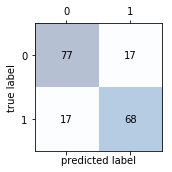

# Tuning hyper-parameters for recall

--> Tuned Parameters Best Score:  0.8466039573602986

--> Best parameters set found on development set: 
 {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'constant', 'solver': 'sgd'}
--> Final Model Training Accuracy score: 0.819 +/- 0.052

--> Final Accuracy score on Test set: 0.79888

Confusion matrix:
[[75 19]
 [17 68]]

Detailed classification report:
              precision    recall  f1-score   support

           0       0.82      0.80      0.81        94
           1       0.78      0.80      0.79        85

   micro avg       0.80      0.80      0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80       179




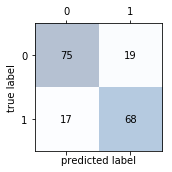

# Tuning hyper-parameters for f1

--> Tuned Parameters Best Score:  0.8176322893478097

--> Best parameters set found on development set: 
 {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (25, 25, 25), 'learning_rate': 'constant', 'solver': 'sgd'}
--> Final Model Training Accuracy score: 0.819 +/- 0.052

--> Final Accuracy score on Test set: 0.80447

Confusion matrix:
[[75 19]
 [16 69]]

Detailed classification report:
              precision    recall  f1-score   support

           0       0.82      0.80      0.81        94
           1       0.78      0.81      0.80        85

   micro avg       0.80      0.80      0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.80      0.80       179




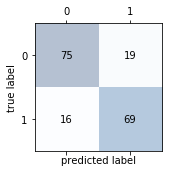

______________________________________________________________________________




In [238]:
#Specifying the classifier that will be tuned with GridSearch
mlp = MLPClassifier(max_iter=150, tol=1e-4, random_state=1)

#Tuning hyperparameters, specifing a range of values for the GridSearch to select the optimal hyperparamater values
parameter_space = {
    'hidden_layer_sizes': [(10,10,10),(25,25,25),(50,50,50),(75,75,75),(50,100,50),(100,100,100), (100,50,100),(100,150,100)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha':[0.0001, 0.001, 0.01, 0.05, 1],
    'learning_rate': ['constant','adaptive']    
}

#Selecting the statistical measurues that will be used to assess performance of the models
scores = ['accuracy',
         'precision', 
         'recall',
         'f1']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

#Using GridSearch to optimise for accuracy,precision, recall and F1 score
    gs_mlp =GridSearchCV(mlp, parameter_space, n_jobs=1,cv=5,scoring=score)

#Fitting Gridsearch to the training data
    gs_mlp = gs_mlp.fit(X_train_pca, y_train)
    
    print('--> Tuned Parameters Best Score: ',gs_mlp.best_score_)
    print()
    print('--> Best parameters set found on development set: \n',gs_mlp.best_params_)
          
    clf_mlp = gs_mlp.best_estimator_

#Getting final cross-validated score
    clf_mlp.fit(X_train_pca, y_train)
    scores = cross_val_score(estimator= clf_mlp,
                         X=X_train_pca,
                         y=y_train,
                         cv=10,
                         n_jobs=1)
    
    print('--> Final Model Training score using Cross Validation: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))
    print()
    print('--> Final score on Test set: %.5f' %clf_mlp.score(X_test_pca,y_test))

    y_true, y_pred = y_test,clf_mlp.predict(X_test_pca)
    
    pipelines_MLP.append((f"Tuned_MLP_{score.strip('')}",clf_mlp))
    
    
 
    confmat = confusion_matrix(y_true, y_pred)
   
    print()
    print("Confusion matrix:")
    print(confusion_matrix(y_true, y_pred))
    print()
    print("Detailed classification report:")
    print(classification_report(y_true, y_pred))
    print()
    
    
#Plotting the confusion matrix   
    
    fig, ax = plt.subplots(figsize=(2.5, 2.5))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

    plt.xlabel('predicted label')
    plt.ylabel('true label')

    plt.tight_layout()
    plt.show()

print("______________________________________________________________________________")
print()
print()

Train scores: [0.77260088 0.81627024 0.81767211 0.81751708 0.81533615 0.80661461
 0.8109721 ]
Test scores: [0.76764029 0.8178169  0.81492119 0.81634977 0.81916667 0.80230326
 0.81357199]


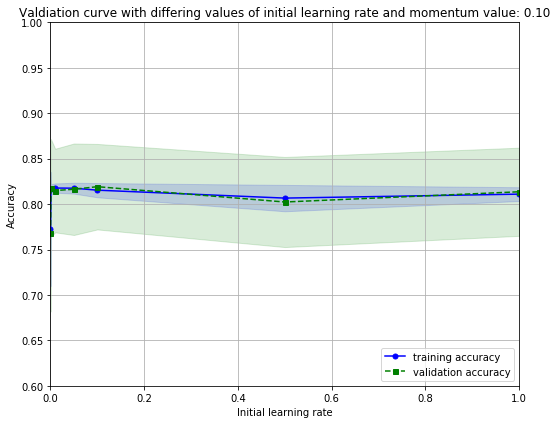

Train scores: [0.7874307  0.81767405 0.8176726  0.81626975 0.81346601 0.8144023
 0.80753972]
Test scores: [0.78692488 0.81640845 0.8177381  0.81492119 0.80932651 0.80650961
 0.81359155]


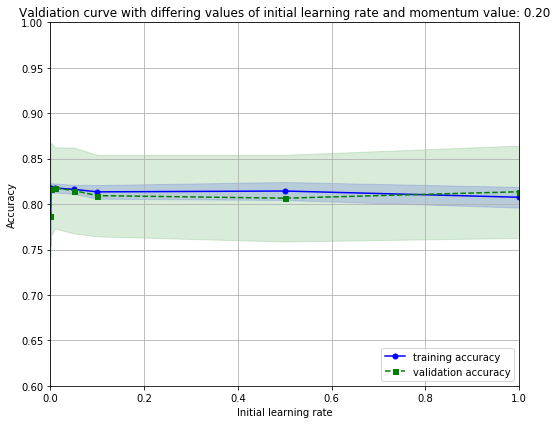

Train scores: [0.78478127 0.81673826 0.81658274 0.81751562 0.81408907 0.808172
 0.78729123]
Test scores: [0.77575844 0.81920523 0.81492119 0.81632964 0.81075453 0.80658786
 0.78964733]


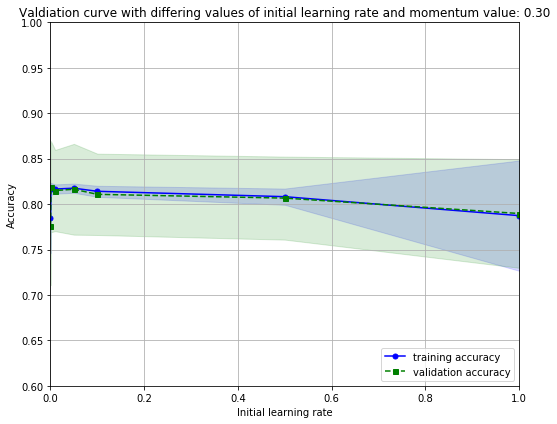

Train scores: [0.7885502  0.81627097 0.81736131 0.81595774 0.81658128 0.81050384
 0.68501977]
Test scores: [0.78401185 0.8122021  0.81632964 0.8107154  0.81216298 0.80375196
 0.67773977]


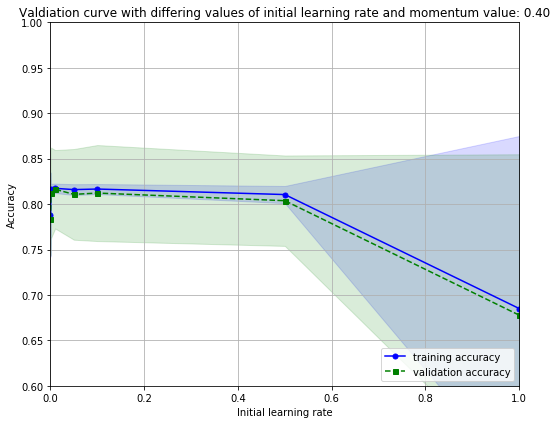

Train scores: [0.78043643 0.81689499 0.81814013 0.81611448 0.81486886 0.81035341
 0.70362745]
Test scores: [0.77851721 0.81499944 0.81634921 0.81631008 0.81075453 0.79660798
 0.68253968]


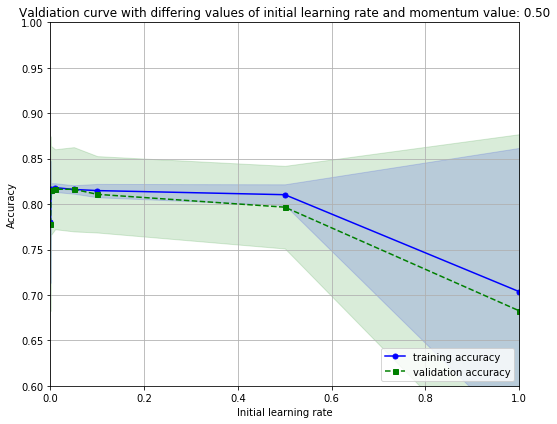

Train scores: [0.80941786 0.8161152  0.81751683 0.81611448 0.814716   0.81003703
 0.64921933]
Test scores: [0.79942488 0.81640789 0.81632964 0.82055556 0.81353119 0.80660742
 0.62690532]


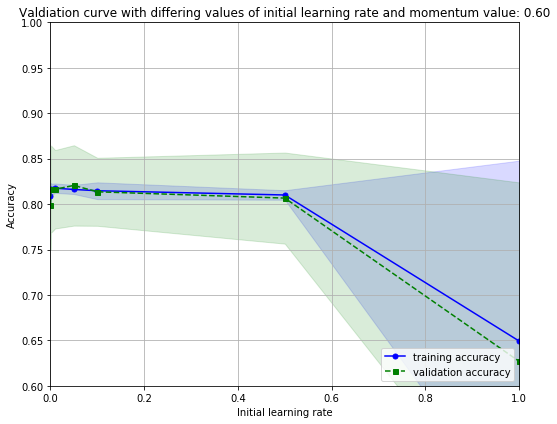

Train scores: [0.81003679 0.81595847 0.81704833 0.81720652 0.81517965 0.80427501
 0.66082387]
Test scores: [0.808055   0.81357143 0.81632964 0.81073497 0.81214342 0.80930695
 0.66852057]


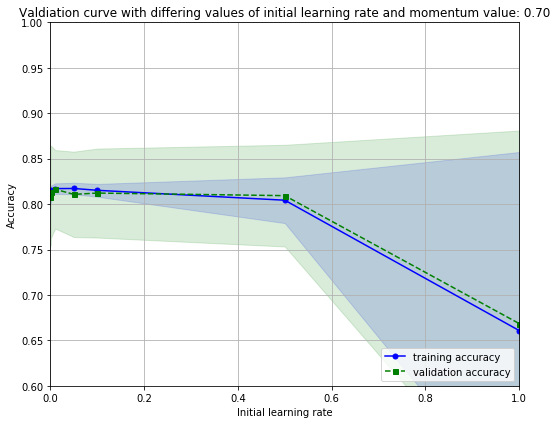

Train scores: [0.81455927 0.81642576 0.81798436 0.81720628 0.8170493  0.80972818
 0.71541342]
Test scores: [0.81365023 0.81218254 0.8177381  0.81355187 0.81492119 0.8206338
 0.71292589]


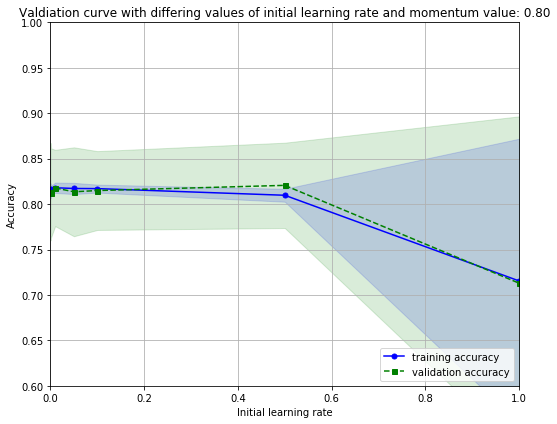

Train scores: [0.81751805 0.81658153 0.81829638 0.81736107 0.81813989 0.80582219
 0.77436847]
Test scores: [0.82057456 0.81914655 0.81775766 0.81079365 0.82194389 0.80384921
 0.7854421 ]


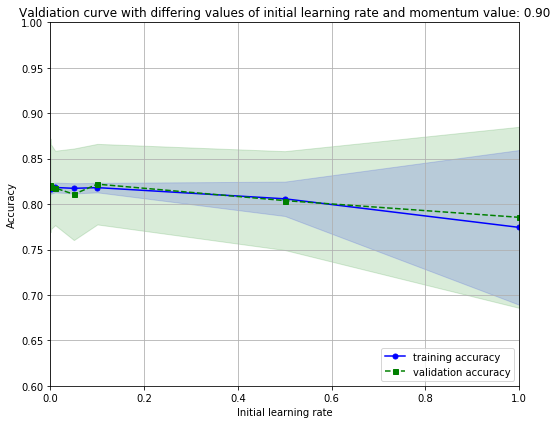

Train scores: [0.81409028 0.81206584 0.81362251 0.80956489 0.81206317 0.63657818
 0.69262617]
Test scores: [0.80936564 0.80652918 0.81083277 0.80795775 0.80517941 0.62704114
 0.6919763 ]


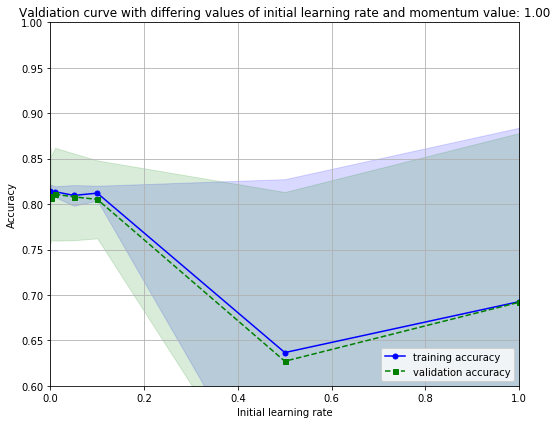

In [241]:
#Using validation curve to determine initial learning rate and momentum values that give the best results for accuracy
for i in np.linspace(0.1,1,10):
    param_range = [0.0001, 0.001, 0.01, 0.05, 0.1, 0.5, 1]
    train_scores, test_scores = validation_curve(
                estimator=MLPClassifier(momentum = i, hidden_layer_sizes = (100,100,100), activation= 'tanh', alpha = 0.0001, 
                                        learning_rate ='constant', solver= 'sgd'), 
                X=X_train_pca, 
                y= y_train, 
                param_name='learning_rate_init', 
                param_range =param_range, cv= 10)
    


    train_mean = np.mean(train_scores, axis=1)
    print((f'Train scores: {train_mean}'))
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    print((f'Test scores: {test_mean}'))
    test_std = np.std(test_scores, axis=1)
    
    plt.figure(figsize=(8,6))
    plt.plot(param_range, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='training accuracy')

    plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

    plt.plot(param_range, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='validation accuracy')

    plt.fill_between(param_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

#Plotting the momentum values agains the relevant initial learning rate values
    plt.grid()
    plt.legend(loc='lower right')
    plt.xlabel('Initial learning rate')
    plt.ylabel('Accuracy')
    plt.ylim([0.6, 1.0])
    plt.xlim([0, 1])
    plt.title('Valdiation curve with differing values of initial learning rate and momentum value: %.2f' %(i))
    plt.tight_layout()
    plt.show()

In [247]:
#Re-runninung the MLP with the initial learning rate  and momentum values that gave the best accuracy
pipe_MLP_2 = Pipeline([('scl', StandardScaler()),
                       ('pca', PCA(n_components=2)),#not needed because most frequent class label used for prediction only
                     ('MLP_2',MLPClassifier(hidden_layer_sizes=(100,100,100), activation='tanh', solver='sgd', alpha=0.0001,
                                            batch_size='auto', learning_rate='constant', learning_rate_init=0.1, power_t=0.5, 
                                            max_iter=200, shuffle=True, random_state=1, tol=0.0001, verbose=False,momentum=0.9))])

#Fit the pipeline to the training data
pipe_MLP_2.fit(X_train, y_train)   


#Calculating cross validated accuracy scores
scores = cross_val_score(estimator=pipe_MLP_2, X=X_train, y=y_train, cv=10, n_jobs=1, verbose=0)
print('--> Final Model Training Accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))
print('--> Final Accuracy on Test set: %.5f' % pipe_MLP_2.score(X_test,y_test))

#Appending the results to the pipelines_MLP list
pipelines_MLP.append(( 'Validation_curve_tuned_MLP_pipeline', pipe_MLP_2))

--> Final Model Training Accuracy: 0.811 +/- 0.044
--> Final Accuracy on Test set: 0.80447


In [248]:
#Fitting the pipeline to the training data
pipe_MLP_2.fit(X_train, y_train)
y_pred = pipe_MLP_2.predict(X_test)

#Calculating the accuracy scoreand presenting the confusion matrix and classification report
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8044692737430168
[[75 19]
 [16 69]]
              precision    recall  f1-score   support

           0       0.82      0.80      0.81        94
           1       0.78      0.81      0.80        85

   micro avg       0.80      0.80      0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.80      0.80       179



In [252]:
#Calculating the cross-validated accuracy scores for the differently tuned MLP models
results_mlp = []
names_mlp = []
scoring = 'accuracy'
for name, model in pipelines_MLP:
    cv_results = cross_val_score(model, X_train, y_train, cv=10,scoring=scoring)
    results_mlp.append(cv_results)
    names_mlp.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

MLP_pipeline_no_PCA: 0.810754 (0.042464)
Tuned_MLP_accuracy: 0.814921 (0.040555)
Tuned_MLP_precision: 0.814921 (0.040555)
Tuned_MLP_recall: 0.809385 (0.044615)
Tuned_MLP_f1: 0.805140 (0.036578)
Validation_curve_tuned_MLP_pipeline: 0.816330 (0.043165)


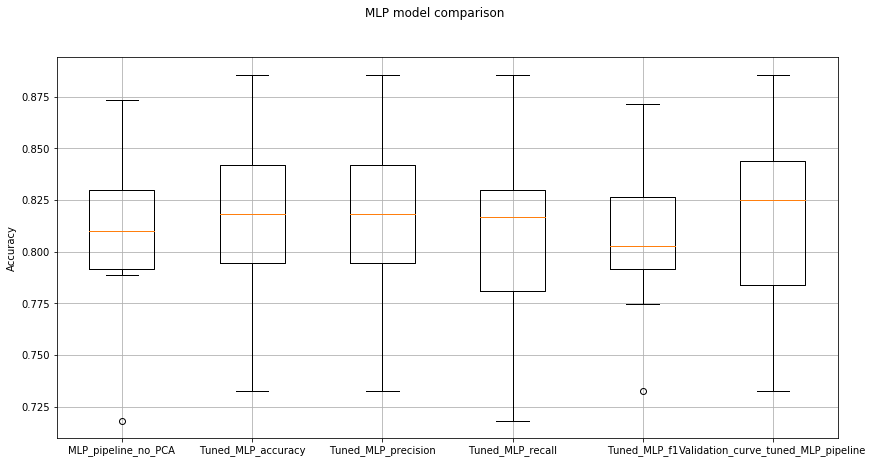

In [253]:
# Plotting boxplots of the differently tuned MLP models for comparison
fig = plt.figure(figsize=(14, 7))
fig.suptitle( 'MLP model comparison' )
ax = fig.add_subplot(111)
plt.grid(True)
plt.boxplot(results_mlp)
plt.ylabel('Accuracy')
ax.set_xticklabels(names_mlp)
plt.show()

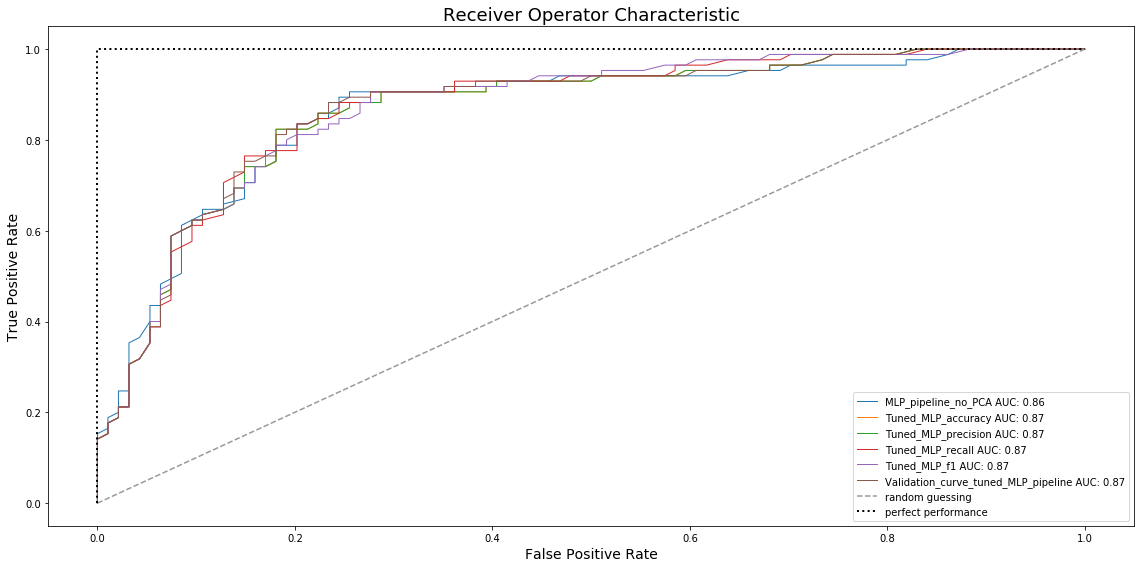

In [254]:
#Plotting the ROC curves for the differently tuned MLP classifiers
fig = plt.figure(figsize=(16, 8))
all_tpr = []

for name, model in pipelines_MLP:
      
    model.fit(X_train, y_train)
    
    probas = model.predict_proba(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, probas[:, 1], pos_label=1)
    roc_auc = auc(fpr, tpr)
    current_auc = str('%.2f' %roc_auc)
    
    plt.plot(fpr, 
             tpr, 
             lw=1, 
             label= str(name + ' AUC: ' + current_auc))

plt.plot([0, 1], 
         [0, 1], 
         linestyle='--', 
         color=(0.6, 0.6, 0.6), 
         label='random guessing')

plt.plot([0, 0, 1], 
         [0, 1, 1], 
         lw=2, 
         linestyle=':', 
         color='black', 
         label='perfect performance')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize =14)
plt.ylabel('True Positive Rate', fontsize =14)
plt.title('Receiver Operator Characteristic', fontsize =18)
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

# Comparing the best SVC and best MLP models

In [255]:
pipelines_comparison=[]

In [256]:
#Appending the best performing SVC model
pipelines_comparison.append(pipelines_SVC[1])

In [257]:
#Appending the best performing MLP model
pipelines_comparison.append(pipelines_MLP[5])

In [258]:
#Calculating the cross-validated accuracy scores for the best SVC and best MLP model
results_final = []
names_final = []
scoring = 'accuracy'
for name, model in pipelines_comparison:
    cv_results = cross_val_score(model, X_train, y_train, cv=10,scoring=scoring)
    results_final.append(cv_results)
    names_final.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

SVC_tuned_for_accuracy: 0.822062 (0.051398)
Validation_curve_tuned_MLP_pipeline: 0.816330 (0.043165)


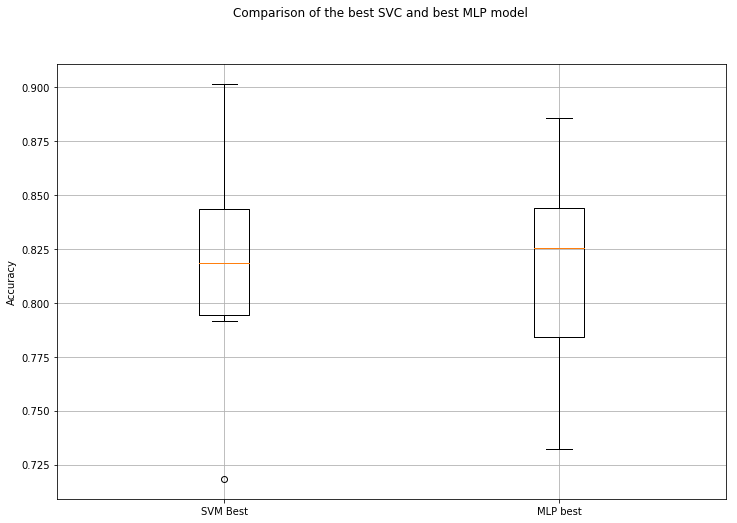

In [259]:
# Plotting boxplots of the best SVC and best MLP model
fig = plt.figure(figsize=(12,8))
fig.suptitle( 'Comparison of the best SVC and best MLP model' )
ax = fig.add_subplot(111)
plt.boxplot(results_final)
plt.ylabel('Accuracy')
ax.set_xticklabels(('SVM Best', 'MLP best'))
plt.grid(True)
plt.show()

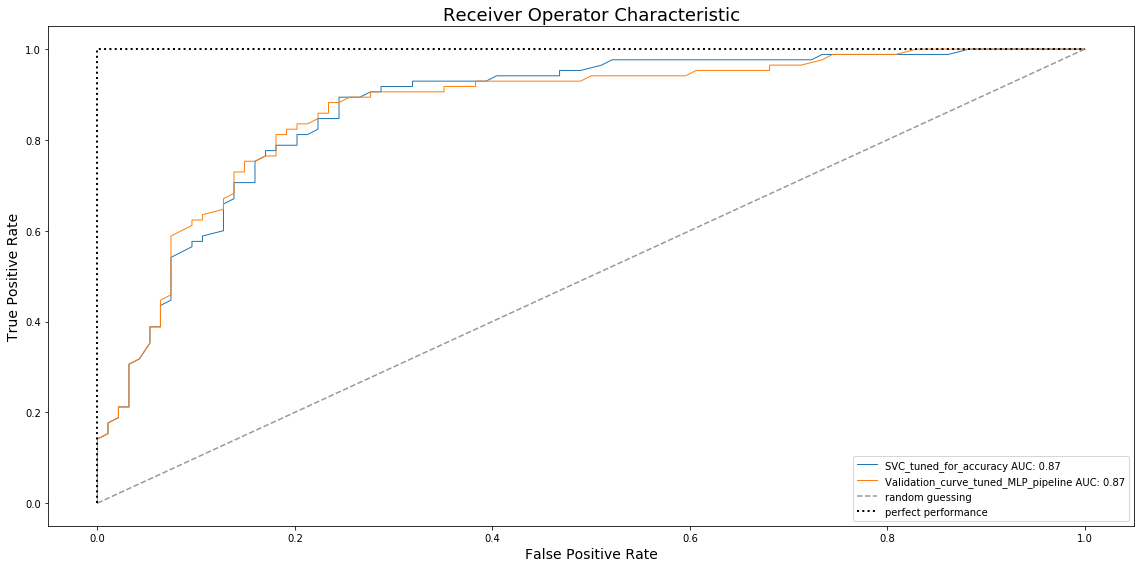

In [260]:
#Plotting the ROC curves for the best performing SVC and MLP models
fig = plt.figure(figsize=(16, 8))
all_tpr = []

for name, model in pipelines_comparison:
      
    model.fit(X_train, y_train)
    
    probas = model.predict_proba(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, probas[:, 1], pos_label=1)
    roc_auc = auc(fpr, tpr)
    current_auc = str('%.2f' %roc_auc)
    
    plt.plot(fpr, 
             tpr, 
             lw=1, 
             label= str(name + ' AUC: ' + current_auc))

plt.plot([0, 1], 
         [0, 1], 
         linestyle='--', 
         color=(0.6, 0.6, 0.6), 
         label='random guessing')

plt.plot([0, 0, 1], 
         [0, 1, 1], 
         lw=2, 
         linestyle=':', 
         color='black', 
         label='perfect performance')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate',fontsize =14)
plt.ylabel('True Positive Rate',fontsize =14)
plt.title('Receiver Operator Characteristic',fontsize =18)
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()